In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
%matplotlib inline

In [190]:
covid_df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gui prj\time_series_covid19_confirmed_global.csv")

In [191]:
covid_df.sample(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22
30,NaN,Botswana,-22.3285,24.6849,0,0,0,0,0,0,...,305859,305859,305859,305984,305984,305984,305984,305984,305984,306200
166,NaN,Latvia,56.8796,24.6032,0,0,0,0,0,0,...,817439,818030,818644,821602,822013,822013,822013,822726,823110,823110
31,NaN,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,...,30355919,30378061,30399004,30418920,30433042,30448236,30454499,30460997,30482429,30502501
102,NaN,Czechia,49.8175,15.4730,0,0,0,0,0,0,...,3898406,3900444,3902095,3903659,3905101,3905101,3906098,3907793,3909167,3910386
134,NaN,Georgia,42.3154,43.3569,0,0,0,0,0,0,...,1654313,1654375,1654665,1654797,1654945,1655098,1655170,1655221,1655221,1655221
221,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,23285,23285,23285,23361,23394,23394,23394,23459,23482,23538
241,NaN,Summer Olympics 2020,35.6491,139.7737,0,0,0,0,0,0,...,865,865,865,865,865,865,865,865,865,865
15,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,1522265,1532685,1542059,1552647,1561415,1561415,1576945,1586876,1597464,1609060
46,Newfoundland and Labrador,Canada,53.1355,-57.6604,0,0,0,0,0,0,...,43401,43713,43713,43920,43920,43920,43920,44148,44345,44345
58,NaN,Chile,-35.6751,-71.5430,0,0,0,0,0,0,...,3547977,3549327,3551383,3553956,3556333,3558631,3561016,3562521,3563650,3566183


In [192]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 838 entries, Province/State to 5/4/22
dtypes: float64(2), int64(834), object(2)
memory usage: 1.8+ MB


In [193]:
covid_df.drop(columns=['Lat', 'Long'], inplace=True)
covid_df.head(3)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,178745,178769,178809,178850,178873,178879,178899,178901,178901,178901
1,NaN,Albania,0,0,0,0,0,0,0,0,...,274828,274862,274929,275002,275055,275107,275167,275177,275191,275211
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265771,265772,265773,265776,265779,265780,265782,265782,265782,265782


In [194]:
# number of countries
covid_df['Country/Region'].nunique()

198

In [195]:
# average cases in May 4 2022
covid_df['5/4/22'].mean()

1815478.2887323943

In [196]:
# check if the USA is in our dataset
covid_df[covid_df['Country/Region'].str.contains('united|state|america', case=False)]

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22
259,NaN,United Arab Emirates,0,0,0,0,0,0,0,4,...,897351,897558,897770,898045,898310,898571,898811,899033,899242,899441
260,Anguilla,United Kingdom,0,0,0,0,0,0,0,0,...,2731,2788,2788,2788,2788,2788,2788,2788,2788,2788
261,Bermuda,United Kingdom,0,0,0,0,0,0,0,0,...,13200,13252,13488,13488,13488,13488,13488,13559,13559,13832
262,British Virgin Islands,United Kingdom,0,0,0,0,0,0,0,0,...,6296,6296,6296,6355,6355,6355,6355,6355,6355,6355
263,Cayman Islands,United Kingdom,0,0,0,0,0,0,0,0,...,21755,21755,22223,22223,22223,22223,22223,22223,22223,22828
264,Channel Islands,United Kingdom,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,Falkland Islands (Malvinas),United Kingdom,0,0,0,0,0,0,0,0,...,152,168,168,177,177,177,177,181,181,197
266,Gibraltar,United Kingdom,0,0,0,0,0,0,0,0,...,17706,17706,17706,17706,17837,17837,17837,17837,17837,17837
267,Guernsey,United Kingdom,0,0,0,0,0,0,0,0,...,24201,24201,24573,24573,24573,24573,24573,24573,24573,24832
268,Isle of Man,United Kingdom,0,0,0,0,0,0,0,0,...,31666,31666,31666,32205,32205,32205,32205,32205,32205,32424


In [197]:
# get rid of provinces so that we can concentrate on countries only
covid_agg = covid_df.groupby('Country/Region').sum()
covid_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/25/22,4/26/22,4/27/22,4/28/22,4/29/22,4/30/22,5/1/22,5/2/22,5/3/22,5/4/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,178745,178769,178809,178850,178873,178879,178899,178901,178901,178901
Albania,0,0,0,0,0,0,0,0,0,0,...,274828,274862,274929,275002,275055,275107,275167,275177,275191,275211
Algeria,0,0,0,0,0,0,0,0,0,0,...,265771,265772,265773,265776,265779,265780,265782,265782,265782,265782
Andorra,0,0,0,0,0,0,0,0,0,0,...,41013,41013,41013,41349,41349,41349,41349,41349,41349,41717
Angola,0,0,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


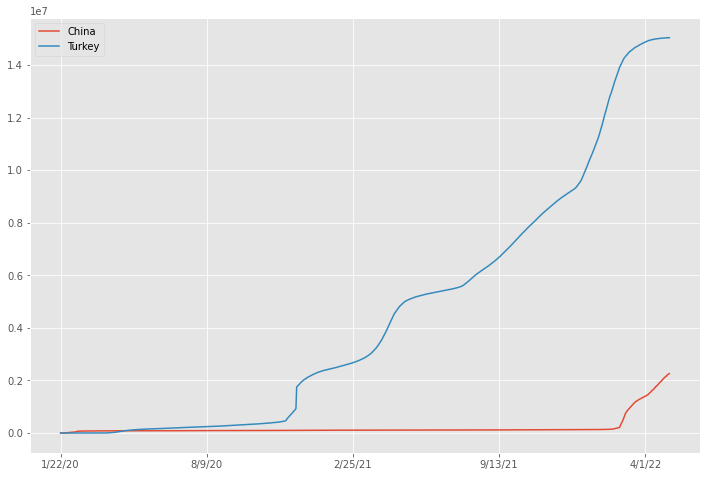

In [198]:
plt.figure(figsize=(12,8))

covid_agg.loc['China'].plot()
covid_agg.loc['Turkey'].plot()

plt.legend();

<AxesSubplot:>

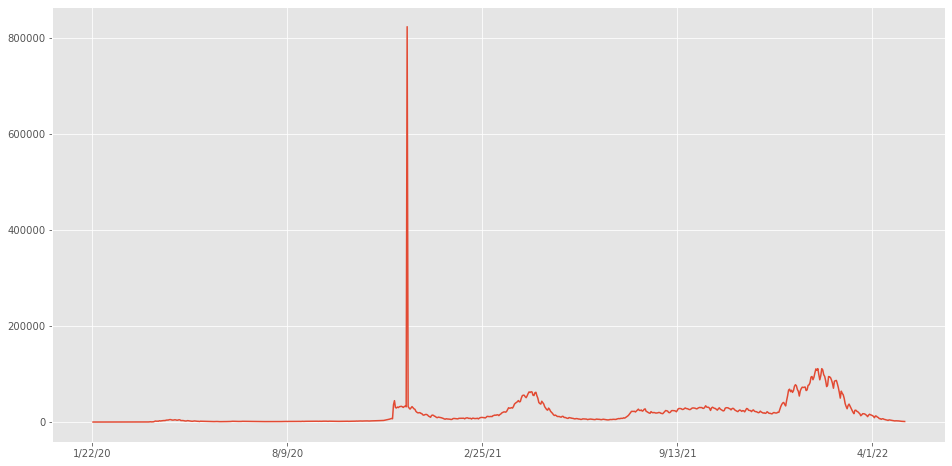

In [199]:
# calculating the rate of change in covid cases in Turkey
plt.figure(figsize=(16,8))
covid_agg.loc['Turkey'].diff().plot()

In [181]:
# how much did the cases in Turkey increased most in one day
covid_agg.loc['Turkey'].diff().max()

823225.0

In [182]:
# find the maximum infection rate for all countries
max_infection = {country: covid_agg.loc[country].diff().max() for country in covid_agg.index}
max_infection

{'Afghanistan': 3243.0,
 'Albania': 4789.0,
 'Algeria': 2521.0,
 'Andorra': 2313.0,
 'Angola': 5035.0,
 'Antarctica': 11.0,
 'Antigua and Barbuda': 468.0,
 'Argentina': 139853.0,
 'Armenia': 4388.0,
 'Australia': 175271.0,
 'Austria': 58583.0,
 'Azerbaijan': 7779.0,
 'Bahamas': 1497.0,
 'Bahrain': 8173.0,
 'Bangladesh': 16230.0,
 'Barbados': 1329.0,
 'Belarus': 8921.0,
 'Belgium': 133480.0,
 'Belize': 1517.0,
 'Benin': 59442.0,
 'Bhutan': 2291.0,
 'Bolivia': 23611.0,
 'Bosnia and Herzegovina': 5254.0,
 'Botswana': 41576.0,
 'Brazil': 287149.0,
 'Brunei': 7380.0,
 'Bulgaria': 12399.0,
 'Burkina Faso': 1005.0,
 'Burma': 7083.0,
 'Burundi': 4710.0,
 'Cabo Verde': 1469.0,
 'Cambodia': 1130.0,
 'Cameroon': 9668.0,
 'Canada': 63808.0,
 'Central African Republic': 4044.0,
 'Chad': 596.0,
 'Chile': 41651.0,
 'China': 77402.0,
 'Colombia': 35575.0,
 'Comoros': 275.0,
 'Congo (Brazzaville)': 1188.0,
 'Congo (Kinshasa)': 4481.0,
 'Costa Rica': 18188.0,
 "Cote d'Ivoire": 2858.0,
 'Croatia': 11812.

In [261]:
# add the max_infection column, plus reverse the column order
covid_agg['max_infection'] = max_infection.values()
covid_agg.columns = covid_agg.columns[::-1]
covid_agg 

,max_infection,5/4/22,5/3/22,5/2/22,5/1/22,4/30/22,4/29/22,4/28/22,4/27/22,4/26/22,...,1/31/20,1/30/20,1/29/20,1/28/20,1/27/20,1/26/20,1/25/20,1/24/20,1/23/20,1/22/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3243.0,0,0,0,0,0,0,0,0,0,...,178769,178809,178850,178873,178879,178899,178901,178901,178901,3243.0
Albania,4789.0,0,0,0,0,0,0,0,0,0,...,274862,274929,275002,275055,275107,275167,275177,275191,275211,4789.0
Algeria,2521.0,0,0,0,0,0,0,0,0,0,...,265772,265773,265776,265779,265780,265782,265782,265782,265782,2521.0
Andorra,2313.0,0,0,0,0,0,0,0,0,0,...,41013,41013,41349,41349,41349,41349,41349,41349,41717,2313.0
Angola,5035.0,0,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,5035.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,30356.0,0,0,0,0,0,0,0,0,0,...,657060,657060,657060,657060,657060,657060,657060,657060,657060,30356.0
Winter Olympics 2022,72.0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,72.0
Yemen,287.0,0,0,0,0,0,0,0,0,0,...,11818,11818,11818,11818,11818,11818,11819,11819,11819,287.0


In [247]:
happiness_df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gui prj\worldwide_happiness_2019.csv")
happiness_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [248]:
happiness_df.drop(columns=['Overall rank', 'Freedom to make life choices'], inplace=True)

In [249]:
happiness_df.Score.mean()

5.407096153846153

In [250]:
happiness_df[happiness_df['Country or region'] == 'Turkey']

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption
78,Turkey,5.373,1.183,1.36,0.808,0.083,0.106


In [251]:
# the 20 unhappiest countries
happiness_df.tail(20)

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption
136,Egypt,4.166,0.913,1.039,0.644,0.076,0.067
137,Zambia,4.107,0.578,1.058,0.426,0.247,0.087
138,Togo,4.085,0.275,0.572,0.410,0.177,0.085
139,India,4.015,0.755,0.765,0.588,0.200,0.085
140,Liberia,3.975,0.073,0.922,0.443,0.233,0.033
141,Comoros,3.973,0.274,0.757,0.505,0.275,0.078
142,Madagascar,3.933,0.274,0.916,0.555,0.169,0.041
143,Lesotho,3.802,0.489,1.169,0.168,0.107,0.093
144,Burundi,3.775,0.046,0.447,0.380,0.176,0.180
145,Zimbabwe,3.663,0.366,1.114,0.433,0.151,0.089


#### The below graph suggests that there is a relation between gdp per capita and happiness score although this relation is not consistent.


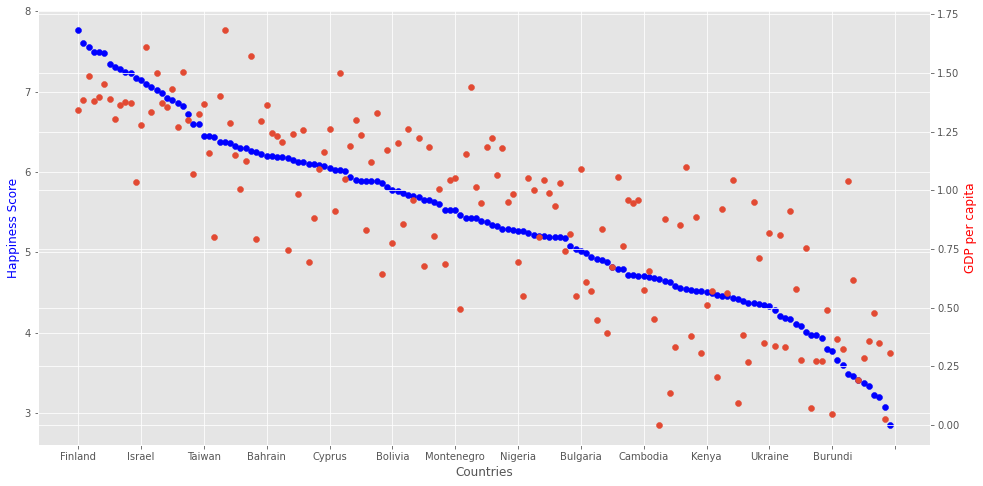

In [252]:
plt.figure(figsize=(16,8))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.scatter(happiness_df['Country or region'], happiness_df['Score'], color='b')
ax2.scatter(happiness_df['Country or region'], happiness_df['GDP per capita'])

ax1.set_ylabel('Happiness Score', color='b')
ax2.set_ylabel('GDP per capita', color='r')

myLocator = mticker.MultipleLocator(12)
ax1.xaxis.set_major_locator(myLocator)

ax1.set_xlabel('Countries');

### Reindex the happiness data set so that we can look at it closely with COVID19 data set

In [253]:
happiness_df.set_index('Country or region', inplace=True)
happiness_df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption
Country or region,,,,,,
Finland,7.769,1.340,1.587,0.986,0.153,0.393
Denmark,7.600,1.383,1.573,0.996,0.252,0.410
Norway,7.554,1.488,1.582,1.028,0.271,0.341
Iceland,7.494,1.380,1.624,1.026,0.354,0.118
Netherlands,7.488,1.396,1.522,0.999,0.322,0.298


In [254]:
print('the number of countries in happiness dataset and covid dataset are respectively', len(happiness_df.index), 'and' ,len(covid_agg.index))

the number of countries in happiness dataset and covid dataset are respectively 156 and 198


#### As the number of countries in the two dataframe are different, let inner join the happiness data frame with max_infection series.

In [276]:
join_df = happiness_df.join(covid_agg['max_infection'], how='inner')
join_df

,Score,GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption,max_infection
Finland,7.769,1.340,1.587,0.986,0.153,0.393,50889.0
Denmark,7.600,1.383,1.573,0.996,0.252,0.410,55709.0
Norway,7.554,1.488,1.582,1.028,0.271,0.341,26109.0
Iceland,7.494,1.380,1.624,1.026,0.354,0.118,7408.0
Netherlands,7.488,1.396,1.522,0.999,0.322,0.298,380498.0
...,...,...,...,...,...,...,...
Rwanda,3.334,0.359,0.711,0.614,0.217,0.411,3072.0
Tanzania,3.231,0.476,0.885,0.499,0.276,0.147,24307.0
Afghanistan,3.203,0.350,0.517,0.361,0.158,0.025,3243.0
Central African Republic,3.083,0.026,0.000,0.105,0.235,0.035,4044.0


In [277]:
# display the correlation matrix and observe that there is a positive correlation between max_infection and the measures of  
# happiness score
join_df.corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Generosity,Perceptions of corruption,max_infection
Score,1.000000,0.795413,0.784094,0.801891,0.097775,0.419293,0.286807
GDP per capita,0.795413,1.000000,0.757521,0.859431,-0.097441,0.311759,0.297991
Social support,0.784094,0.757521,1.000000,0.751632,-0.060586,0.203333,0.250887
Healthy life expectancy,0.801891,0.859431,0.751632,1.000000,-0.052984,0.311566,0.316062
Generosity,0.097775,-0.097441,-0.060586,-0.052984,1.000000,0.326430,0.027152
Perceptions of corruption,0.419293,0.311759,0.203333,0.311566,0.326430,1.000000,0.183800
max_infection,0.286807,0.297991,0.250887,0.316062,0.027152,0.183800,1.000000


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


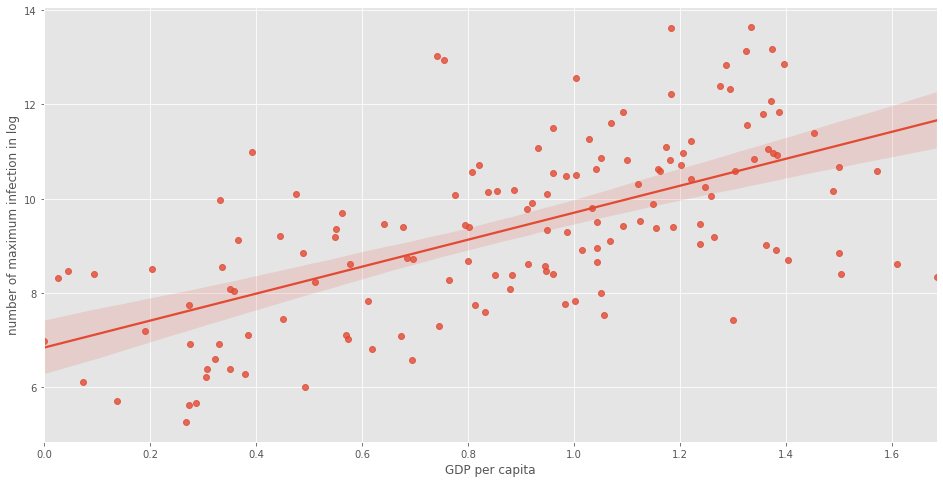

In [289]:
plt.figure(figsize=(16,8))

x = join_df['GDP per capita']
y = np.log(join_df['max_infection'])

ax = sns.regplot(x, y)
ax.set(xlabel='GDP per capita', ylabel='number of maximum infection in log')

plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


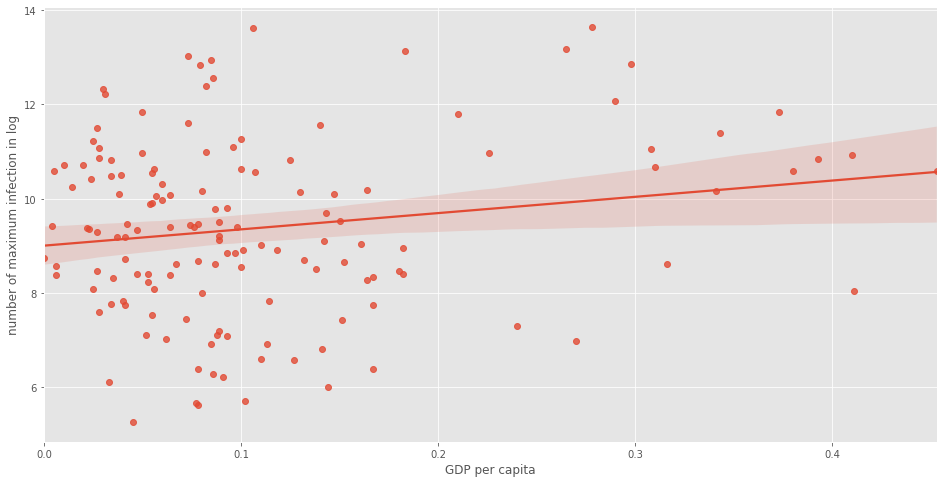

In [294]:
# compare max_infection with perceptions of corruption which is the least correlated max_infection

plt.figure(figsize=(16,8))

x = join_df['Perceptions of corruption']
y = np.log(join_df['max_infection'])

ax = sns.regplot(x, y)
ax.set(xlabel='GDP per capita', ylabel='number of maximum infection in log')

plt.show()